# 1.Load packages

In [39]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
from imblearn.under_sampling import NearMiss

# 2.Preprocessing

## 2.1.Loading dataset

In [40]:
dataset = pd.read_csv('creditcard.csv')

## 2.2.checking missed values

In [41]:
print(dataset.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


There are no missing values

## 2.3.Checking class distribution

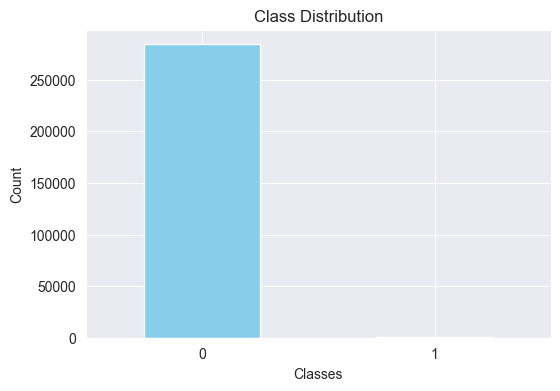

Class
0    284315
1       492
Name: count, dtype: int64


In [42]:
class_distribution = dataset['Class'].value_counts()
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()
print(class_distribution)

our dataset is highly unbalanced: 492 fraud cards vs 284315 normal cards
We need to oversample or undersample our dataset to balance true and false values.
there are too few true values and number of false values are quite 500 times more than them. so oversampling can be a better choice.

## 2.4.Oversampling using SMOTE

In [43]:
Feature = dataset.drop('Class', axis=1)
Class = dataset['Class']
smote = SMOTE(random_state=4)
Balanced_feature, Balanced_class = smote.fit_resample(Feature, Class)

Checking class distribution again

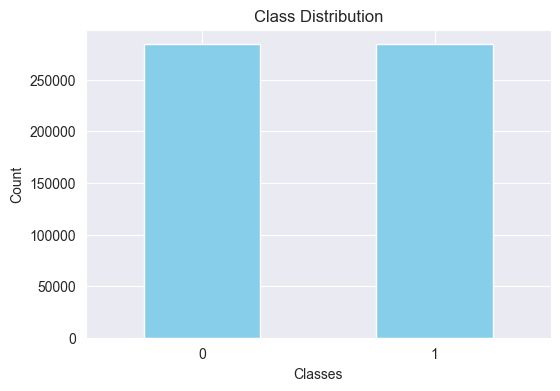

Class
0    284315
1    284315
Name: count, dtype: int64


In [44]:
class_distribution = Balanced_class.value_counts()
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()
print(class_distribution)

our dataset is now balanced

# 3.Clustering using k-means

In [45]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(Balanced_feature)
Balanced_feature = Balanced_feature.assign(Cluster=kmeans.labels_)

In [46]:
count = Balanced_feature['Cluster'].value_counts()
print(count)

Cluster
0    340724
1    227906
Name: count, dtype: int64


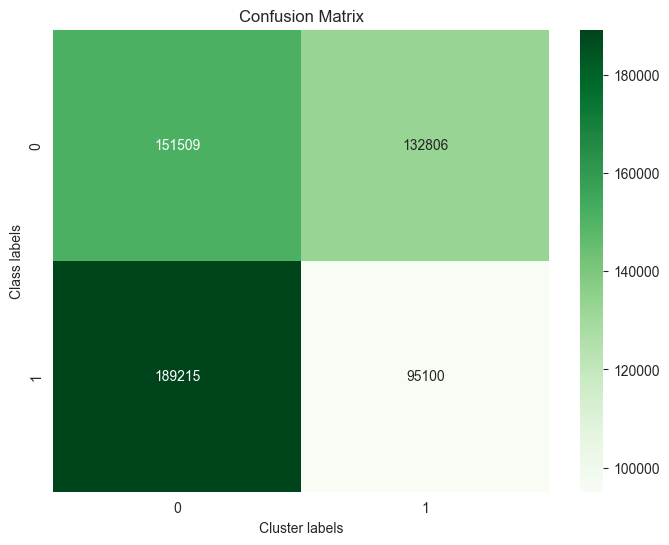

accuracy: 56.63 percent


In [47]:
cm = confusion_matrix(Balanced_class, Balanced_feature['Cluster'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.xlabel('Cluster labels')
plt.ylabel('Class labels')
plt.title('Confusion Matrix')
plt.show()
accuracy = max((cm[0][0] + cm[1][1]),(cm[0][1] + cm[1][0])) / cm.sum()
print("accuracy:", round(accuracy * 100, 2), 'percent')

By using k-means method we can achieve accuracy of 56.6 percent. The confusion matrix demonstrated by heatmap shows that cluster with label 1 has higher amount of false labels (about 58 percent of the cluster is consisted of false labels) and cluster with label 0 is more consisted of true labels(about 55 percent)

# 4.Classification using Logistic Regression

our initial dataset is highly unbalanced and preforming SVC on oversampled data have a high computation cost. so its better to use undersampling here

In [48]:
us = NearMiss()
min_max_scaler = preprocessing.MinMaxScaler()
Feature = min_max_scaler.fit_transform(Feature)
Feature, Class = us.fit_resample(Feature, Class)
feature_train, feature_test, class_train, class_test = train_test_split(Feature, Class, test_size=0.2, random_state=3)

now we perform Logistic Regression:

In [49]:
logreg = LogisticRegression()
logreg.fit(feature_train, class_train)

LogisticRegression()

use our feature test set to predict their class and then use confusion matrix to calculate accuracy:

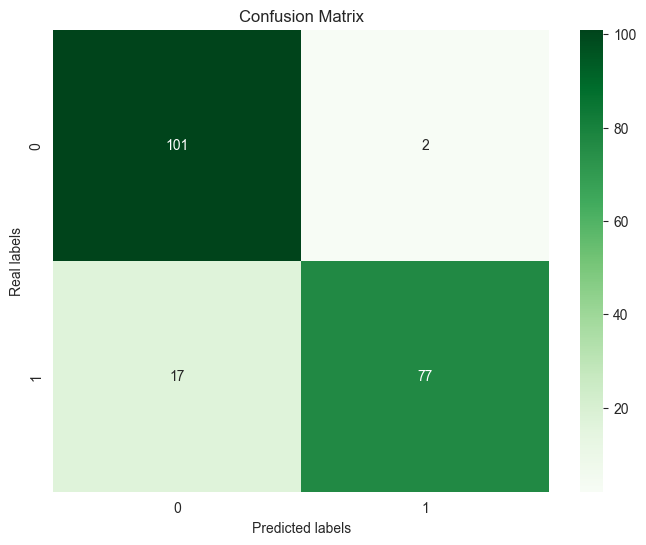

accuracy: 90.36 percent


In [50]:
class_pred = logreg.predict(feature_test)
cm = confusion_matrix(class_test, class_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('Real labels')
plt.title('Confusion Matrix')
plt.show()
accuracy = (cm[0][0] + cm[1][1]) / cm.sum()
print("accuracy:", round(accuracy * 100, 2), 'percent')